In [2]:
#Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [3]:
df = pd.read_csv('london_merged.csv')
df

,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
0,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0
1,2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0
2,2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0
3,2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0
4,2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0
...,...,...,...,...,...,...,...,...,...,...
17409,2017-01-03 19:00:00,1042,5.0,1.0,81.0,19.0,3.0,0.0,0.0,3.0
17410,2017-01-03 20:00:00,541,5.0,1.0,81.0,21.0,4.0,0.0,0.0,3.0
17411,2017-01-03 21:00:00,337,5.5,1.5,78.5,24.0,4.0,0.0,0.0,3.0
17412,2017-01-03 22:00:00,224,5.5,1.5,76.0,23.0,4.0,0.0,0.0,3.0


In [4]:
#Check if all dataa types are correct
df.dtypes

timestamp        object
cnt               int64
t1              float64
t2              float64
hum             float64
wind_speed      float64
weather_code    float64
is_holiday      float64
is_weekend      float64
season          float64
dtype: object

In [5]:
#Creating a day-month-year columns
df['timestamp'] = pd.to_datetime(df['timestamp'])
df['year'] = df['timestamp'].dt.year
df['month'] = df['timestamp'].dt.month
df['day'] = df['timestamp'].dt.day

In [6]:
#Basic descriptive stats
df.describe()

,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season,year,month,day
count,17414.000000,17414.000000,17414.000000,17414.000000,17414.000000,17414.000000,17414.000000,17414.000000,17414.000000,17414.000000,17414.000000,17414.000000
mean,1143.101642,12.468091,11.520836,72.324954,15.913063,2.722752,0.022051,0.285403,1.492075,2015.507810,6.514643,15.751981
std,1085.108068,5.571818,6.615145,14.313186,7.894570,2.341163,0.146854,0.451619,1.118911,0.508157,3.452509,8.793704
min,0.000000,-1.500000,-6.000000,20.500000,0.000000,1.000000,0.000000,0.000000,0.000000,2015.000000,1.000000,1.000000
25%,257.000000,8.000000,6.000000,63.000000,10.000000,1.000000,0.000000,0.000000,0.000000,2015.000000,4.000000,8.000000
50%,844.000000,12.500000,12.500000,74.500000,15.000000,2.000000,0.000000,0.000000,1.000000,2016.000000,7.000000,16.000000
75%,1671.750000,16.000000,16.000000,83.000000,20.500000,3.000000,0.000000,1.000000,2.000000,2016.000000,10.000000,23.000000
max,7860.000000,34.000000,34.000000,100.000000,56.500000,26.000000,1.000000,1.000000,3.000000,2017.000000,12.000000,31.000000


In [7]:
df

,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season,year,month,day
0,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0,2015,1,4
1,2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0,2015,1,4
2,2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0,2015,1,4
3,2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0,2015,1,4
4,2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0,2015,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
17409,2017-01-03 19:00:00,1042,5.0,1.0,81.0,19.0,3.0,0.0,0.0,3.0,2017,1,3
17410,2017-01-03 20:00:00,541,5.0,1.0,81.0,21.0,4.0,0.0,0.0,3.0,2017,1,3
17411,2017-01-03 21:00:00,337,5.5,1.5,78.5,24.0,4.0,0.0,0.0,3.0,2017,1,3
17412,2017-01-03 22:00:00,224,5.5,1.5,76.0,23.0,4.0,0.0,0.0,3.0,2017,1,3


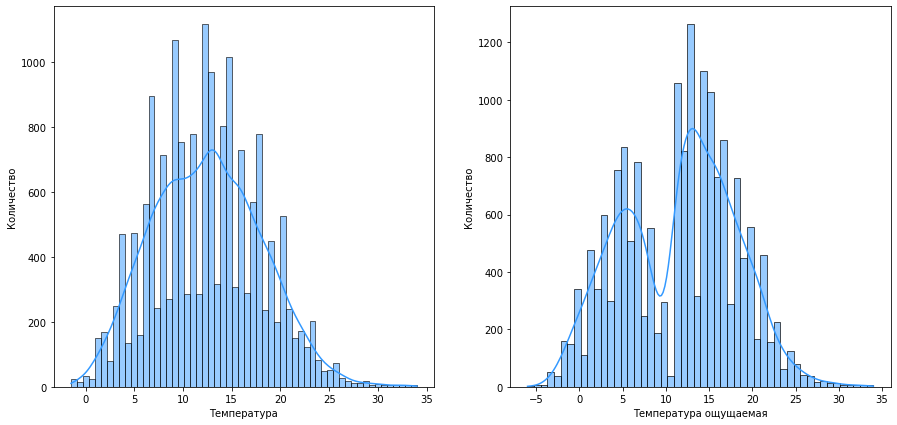

In [8]:
#Charts representing "Temperature" distribution
f, (ax_hist1, ax_hist2) = plt.subplots(1,2, figsize = (15,7))
h1 = sns.histplot(data = df, x = df.t1, kde = True, ax = ax_hist1, color = '#3399ff')
h1.set(xlabel = 'Температура', ylabel = 'Количество')
h2 = sns.histplot(data = df, x = df.t2, kde = True, ax = ax_hist2, color = '#3399ff')
h2.set(xlabel = 'Температура ощущаемая', ylabel = 'Количество')
stats.iqr(df['t1'])
plt.savefig('test.png')

In [9]:
#Creating IQR lower and upper boundaries
iqr_t1 = stats.iqr(df['t1'])
lower_t1 = df['t1'].quantile(0.25) - 1.5*iqr_t1
upper_t1 = df['t1'].quantile(0.75) + 1.5*iqr_t1


iqr_t2 = stats.iqr(df['t2'])
lower_t2 = df['t2'].quantile(0.25) - 1.5*iqr_t2
upper_t2 = df['t2'].quantile(0.75) + 1.5*iqr_t2
(lower_t1,upper_t1, lower_t2,upper_t2)

(-4.0, 28.0, -9.0, 31.0)

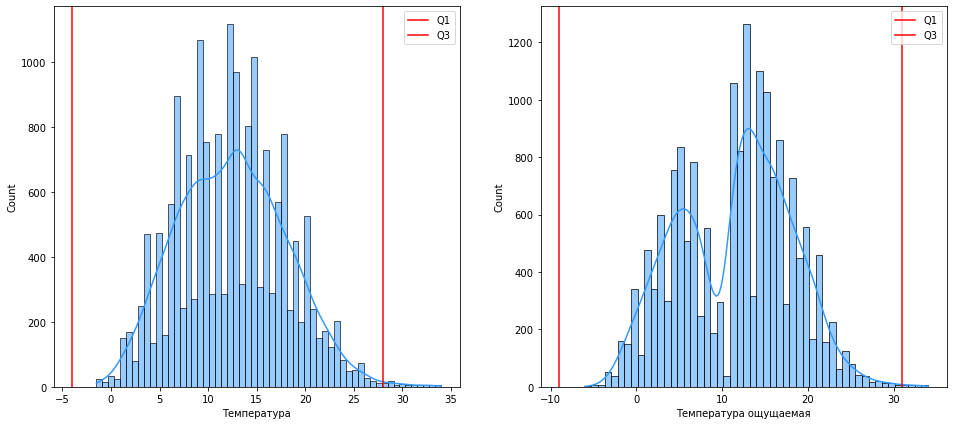

In [10]:
f, (ax_hist1, ax_hist2) = plt.subplots(1,2, figsize = (16,7))

h1 = sns.histplot(data = df, x = df.t1, kde = True, ax = ax_hist1, color = '#3399ff')
h1.set(xlabel = 'Температура')
ax_hist1.axvline(x=lower_t1,color='r', label = 'Q1')
ax_hist1.axvline(x=upper_t1,color='r', label = 'Q3')
h1.legend()

h2 = sns.histplot(data = df, x = df.t2, kde = True, ax = ax_hist2, color = '#3399ff')
h2.set(xlabel = 'Температура ощущаемая')
ax_hist2.axvline(x=lower_t2,color='r', label = 'Q1')
ax_hist2.axvline(x=upper_t2,color='r', label = 'Q3')
h2.legend()
plt.savefig('test1.png')

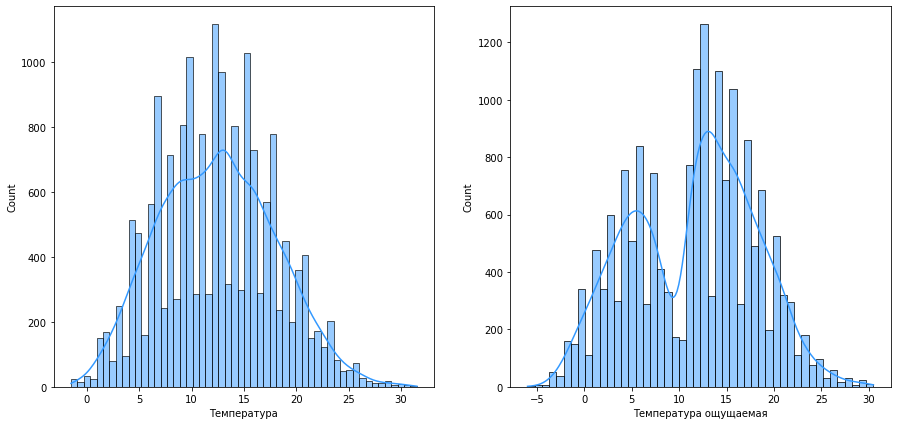

In [11]:
#Filtering out data that is outside lower/upper boundaries to get rid of possible outliers
df_new = df[(df['t1']>lower_t1) & (df['t1']<upper_t1)]
df_new = df[(df['t2']>lower_t2) & (df['t2']<upper_t2)]

f, (ax_hist1, ax_hist2) = plt.subplots(1,2, figsize = (15,7))
h1 = sns.histplot(data = df_new, x = df_new.t1, kde = True, ax = ax_hist1, color = '#3399ff')
h1.set(xlabel = 'Температура')
h2 = sns.histplot(data = df_new, x = df_new.t2, kde = True, ax = ax_hist2, color = '#3399ff')
h2.set(xlabel = 'Температура ощущаемая')
plt.savefig('tes2t.png')

<AxesSubplot:title={'center':'Тепловая карта корреляций по различным признакам'}>

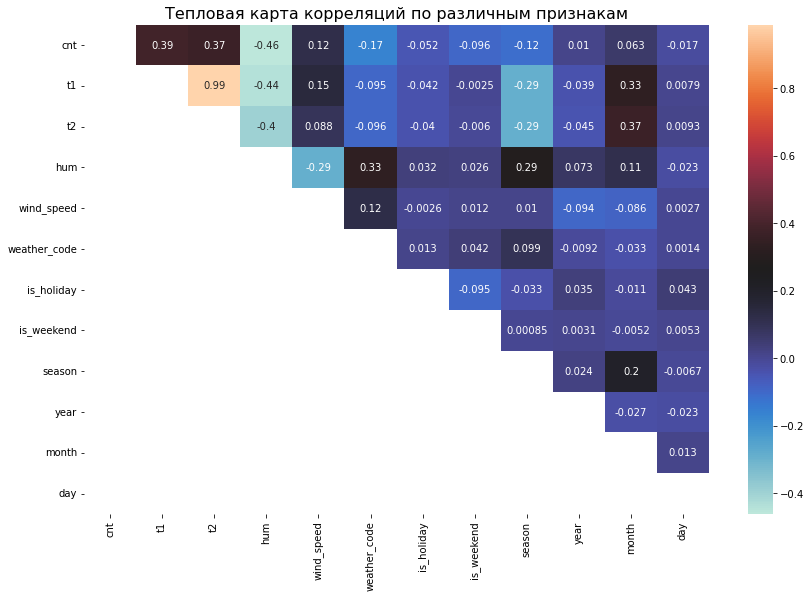

In [12]:
#Correlation heatmap
corr=df_new.corr()
plt.figure(figsize=(14,9))
plt.title('Тепловая карта корреляций по различным признакам', fontdict = {'fontsize' : '16'})
matrix=np.tril(corr)
sns.heatmap(corr,annot=True, mask = matrix, cmap = sns.color_palette("icefire", as_cmap=True))

<AxesSubplot:title={'center':'KDE of humidity and wind speed'}, xlabel='wind_speed', ylabel='hum'>

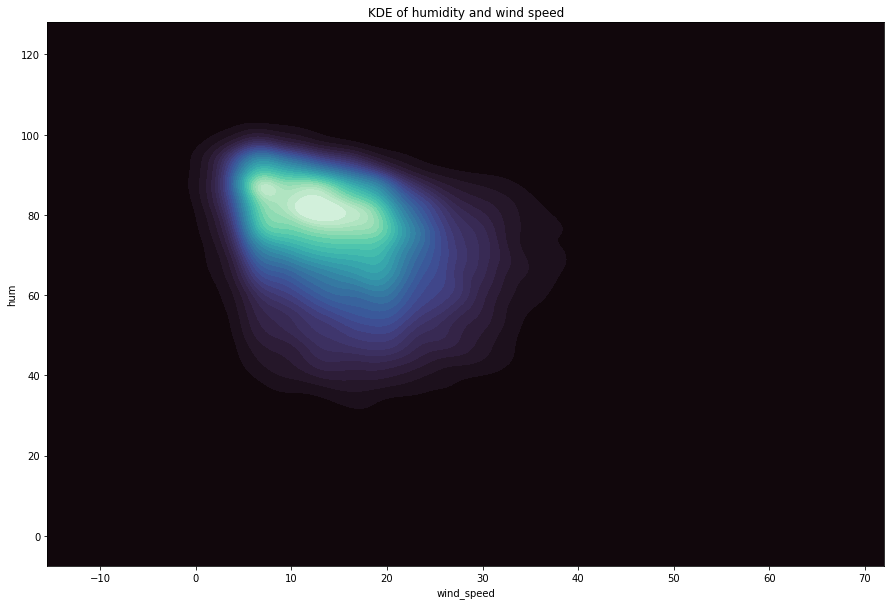

In [13]:
cmap = sns.color_palette("mako", as_cmap=True)
plt.figure(figsize = (15,10))
plt.title('KDE of humidity and wind speed')
sns.kdeplot(data = df_new,
    x="wind_speed", y="hum",
    cmap=cmap, fill=True, cut=10,
    thresh=0, levels=30
)

<AxesSubplot:xlabel='hum', ylabel='cnt'>

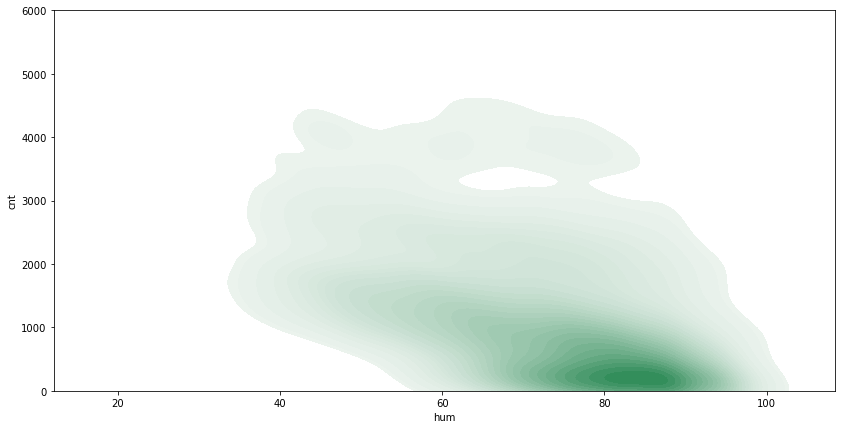

In [14]:
cmap = sns.light_palette("seagreen", as_cmap=True)
plt.figure(figsize=(14,7))
sns.kdeplot(
    data=df,
    x="hum", y="cnt",
    palette='light:blue', fill = True, cmap = cmap, levels = 30,
    clip = (-1,6000)
)

<div class="alert alert-block alert-info">
<b>&#9658</b> Большее число арендованных велосипедов наблюдается, когда влажность ниже</div>

<AxesSubplot:xlabel='wind_speed', ylabel='cnt'>

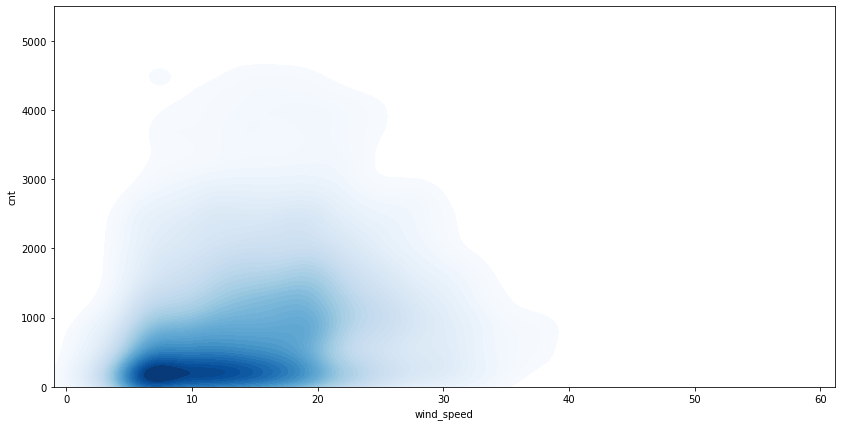

In [15]:
cmap = sns.color_palette("Blues", as_cmap=True)
plt.figure(figsize=(14,7))
sns.kdeplot(
    data=df,
    x="wind_speed", y="cnt",
    fill = True, cmap = cmap, levels = 50, 
    clip = (-1,5500)
)

<div class="alert alert-block alert-info">
<b>&#9658</b> Большее число арендованных велосипедов наблюдается, когда скорость ветра ниже</div>

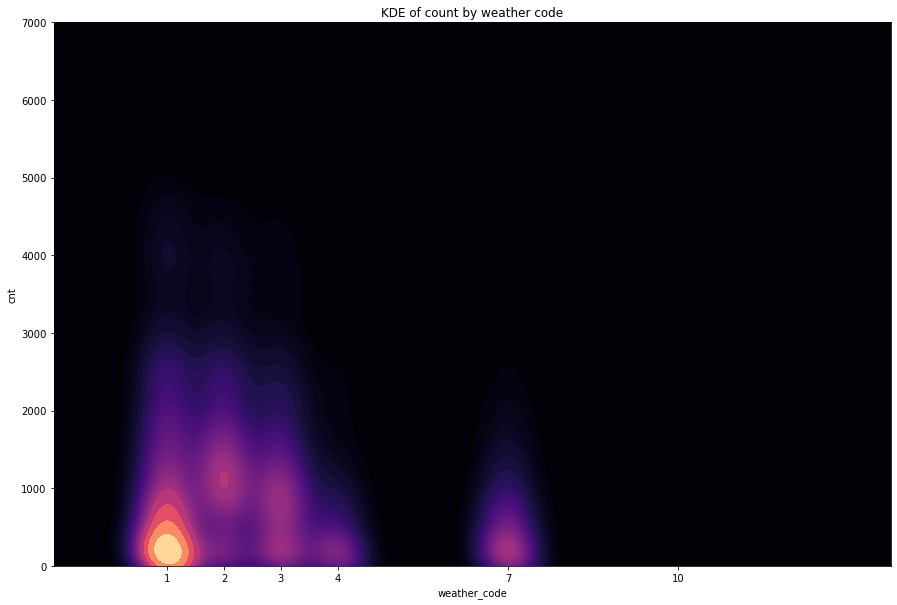

In [16]:
cmap = sns.color_palette("magma", as_cmap=True)
fig, ax = plt.subplots(figsize = (15,10))
sns.kdeplot(data = df_new[df_new['weather_code'] != 26],
    x="weather_code", y="cnt",
    cmap=cmap, fill=True, cut=10,
    thresh=0, levels=30, ax = ax, clip = (-1,7000)
).set(title = 'KDE of count by weather code')
ax.set_xticks([1,2,3,4,7,10])

#1 = Clear  2 = scattered clouds / few clouds 3 = Broken clouds 4 = Cloudy 
#7 = Rain/ light Rain shower/ Light rain 10 = rain with thunderstorm 26 = snowfall 94 = Freezing Fog

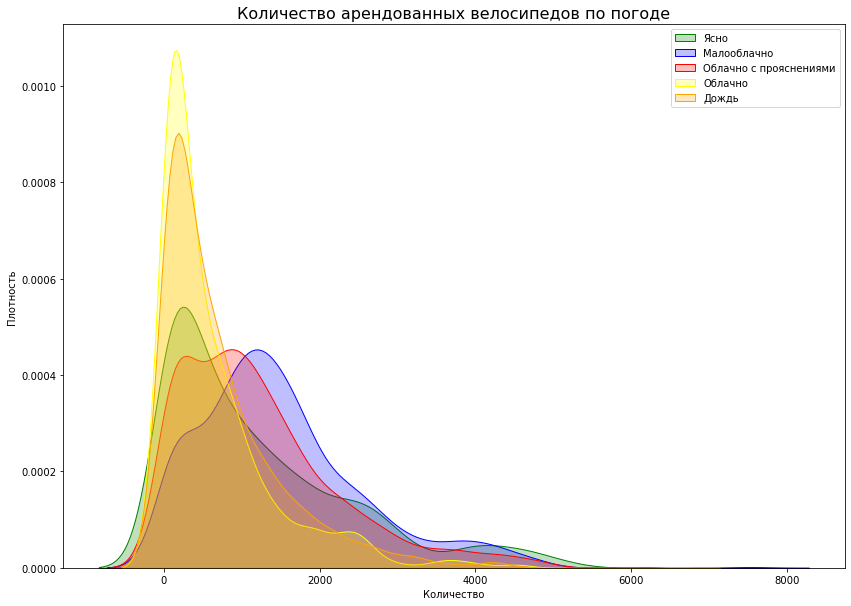

In [17]:
series1 =   df[df['weather_code'] == 1]['cnt'].sample(1400)
series2 =       df[df['weather_code'] == 2]['cnt'].sample(1400)
series3 =          df[df['weather_code'] == 3]['cnt'].sample(1400)
series4 =       df[df['weather_code'] == 4]['cnt'].sample(1400)
series5 =     df[df['weather_code'] == 7]['cnt'].sample(1400)

plt.figure(figsize=(14,10))
sns.kdeplot(series1,color = 'green',shade='green', label = 'Ясно')
sns.kdeplot(series2,color = 'blue',shade = 'blue', label = 'Малооблачно')
sns.kdeplot(series3,color = 'red',shade = 'red', label = 'Облачно с прояснениями')
sns.kdeplot(series4,color = 'yellow',shade = 'yellow', label = 'Облачно')
sns.kdeplot(series5,color = 'orange',shade = 'orange', label = 'Дождь')
plt.xlabel('Количество')
plt.ylabel('Плотность')
plt.title('Количество арендованных велосипедов по погоде', fontdict = {'fontsize':'16'})
plt.legend()
plt.show()

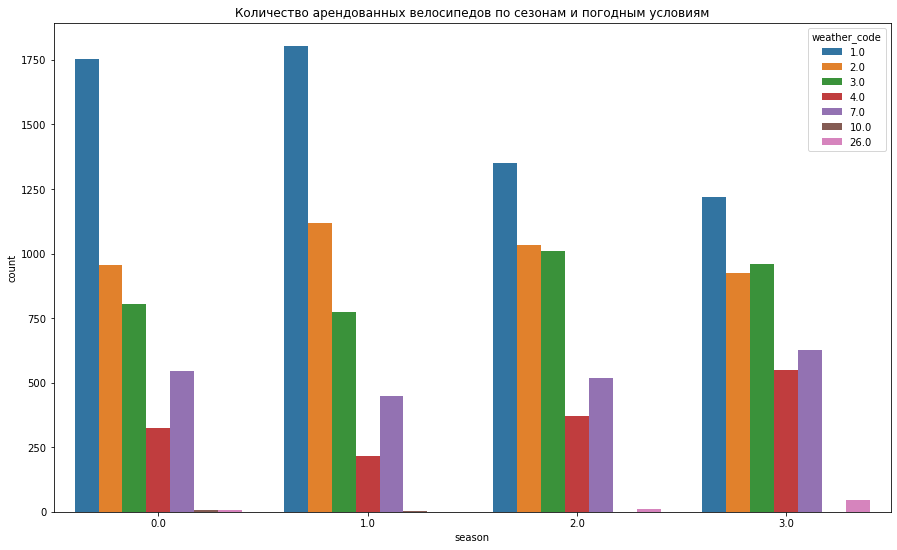

In [18]:
#Season differencies in data
plt.figure(figsize=(15,9))
sns.countplot(x='season',hue='weather_code',data=df_new)
plt.title('Количество арендованных велосипедов по сезонам и погодным условиям')
plt.show()

In [19]:
df_gr = df_new.groupby('month').mean()
corr1 = np.corrcoef(df_gr['t2'],df_gr['cnt'])
corr1

array([[1.        , 0.96272186],
       [0.96272186, 1.        ]])

Text(0, 0.5, 'Количество')

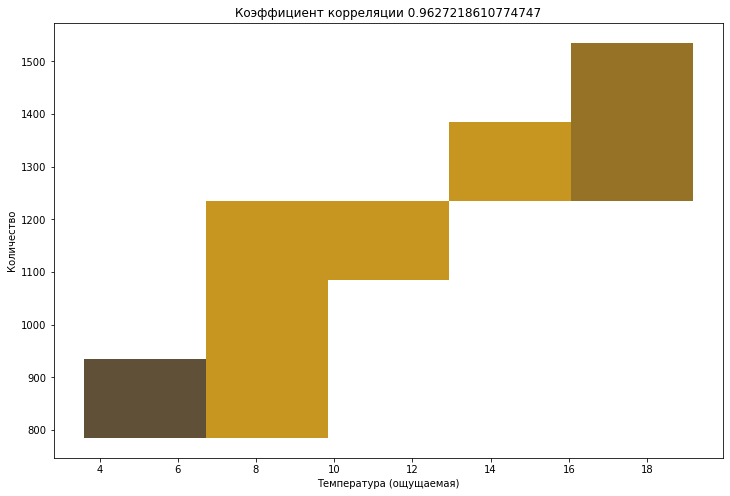

In [23]:
plt.figure(figsize=(12,8))
sns.histplot(data = df_new.groupby('month').mean(), x = 't2', y = 'cnt', color = '#daa520').set(title = f'Коэффициент корреляции {corr1[1][0]}')
plt.xlabel('Температура (ощущаемая)')
plt.ylabel('Количество')

<div class="alert alert-block alert-info">
<b>&#9658</b> Чем выше температура воздуха, тем больше арендуют велосипедов</div>

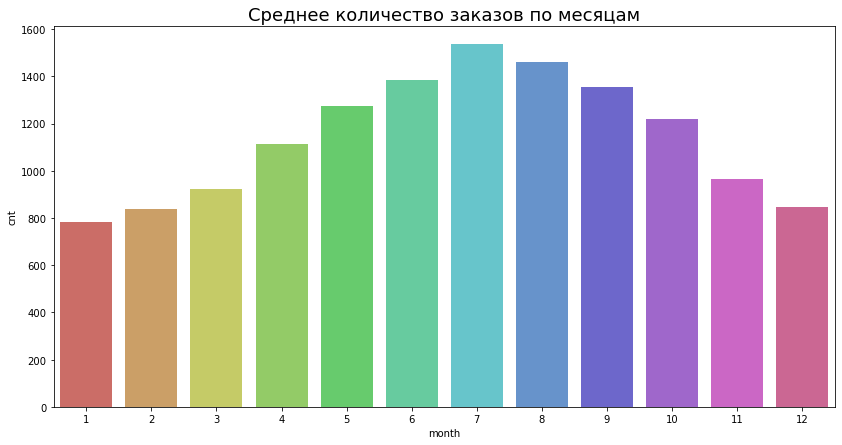

In [37]:
plt.figure(figsize = (14,7))
month_data = df_new.groupby('month')['cnt'].mean()
month_data = month_data.reset_index()
pal = sns.color_palette("hls", 12)
sns.barplot(x='month',y='cnt',data=month_data, palette = pal)
plt.title('Среднее количество заказов по месяцам', {'fontsize':18})
plt.show()

<div class="alert alert-block alert-info">
<b>&#9658</b> В зимние месяцы среднее количество арендованных велосипедов ниже</div>

# Дисперсионный анализ

In [6]:
# 0-spring ; 1-summer; 2-fall; 3-winter
season_1 = df[df['season'] == 0]
season_2 = df[df['season'] == 1]
season_3 = df[df['season'] == 2]
season_4 = df[df['season'] == 3]

<div class="alert alert-block alert-info">
<b>H0:</b> Количество арендованных велосипедов не зависит от сезона</div>
<div class="alert alert-block alert-info">
<b>H1:</b> Количество арендованных велосипедов зависит от сезона</div>

In [12]:
# significance level = 0.05
results = stats.f_oneway(season_1['cnt'],season_2['cnt'], season_3['cnt'], season_4['cnt'])
results

F_onewayResult(statistic=270.33401847455934, pvalue=1.6554720660716692e-171)

<div class="alert alert-block alert-success">
<b>Результат:</b> p_value меньше 0.05, значит отклоняем нулевую гипотезу в пользу альтернативной
</div>

# T-test

In [25]:
not_holiday = df[df['is_holiday'] == 0]
holiday = df[df['is_holiday'] == 1]

<div class="alert alert-block alert-info">
<b>H0:</b> Праздничный день не влияет на количество арендованных велосипедов</div>
<div class="alert alert-block alert-info">
<b>H1:</b> Праздничный день влияет на количество арендованных велосипедов</div>

In [27]:
not_holiday['cnt'].mean()
holiday['cnt'].mean()

769.5260416666666

In [11]:
results = stats.ttest_ind(not_holiday['cnt'],holiday['cnt'])
results

Ttest_indResult(statistic=6.830960089151348, pvalue=8.71373613229693e-12)

<div class="alert alert-block alert-success">
<b>Результат:</b> p_value меньше 0.05, значит отклоняем нулевую гипотезу в пользу альтернативной
</div>

# T-test

In [15]:
not_weekend = df[df['is_weekend'] == 0]
weekend = df[df['is_weekend'] == 1]

<div class="alert alert-block alert-info">
<b>H0:</b> Выходной не влияет на количество арендованных велосипедов</div>
<div class="alert alert-block alert-info">
<b>H1:</b> Выходной влияет на количество арендованных велосипедов</div>

In [16]:
results = stats.ttest_ind(not_weekend['cnt'],weekend['cnt'])
results

Ttest_indResult(statistic=12.79320159932363, pvalue=2.6347554280480275e-37)

<div class="alert alert-block alert-success">
<b>Результат:</b> p_value меньше 0.05, значит отклоняем нулевую гипотезу в пользу альтернативной
</div>

In [49]:
y_15 = df[df['year']==2015]
y_16 = df[df['year']==2016]
results = stats.ttest_ind(y_15['cnt'], y_16['cnt'])
results

Ttest_indResult(statistic=-2.2844339825836526, pvalue=0.022358064462742674)